# Gambler's problem using Generalized Policy Iteration
State(s) = Captial of Gambler: 1 to 99

Action = Can bet 1 to min(s, 100 - s) that a coin tossess heads(coin's head tossing prob = 0.4)

Goal = Reach state of 100, don't loose all the money

Reward = +1, when reached 100. 0 in all other cases

In [197]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [198]:
# initialzie values Dict. State: Value 
values = {i: 0.1 for i in range(1,100)}

In [199]:
# initialize policy dict. State: action(amount to be bet)
policy = {i: 1 for i in range(1,100)}

In [200]:
def reward(val):
    return 1 if val >= 100 else 0

In [201]:
# using policy find the values
def policy_eval(values, policy, p_s_dash_r=0.4, gamma=1):
    for capital, _ in values.items():
        action = policy[capital]

        state_if_win = capital + action
        state_if_lost = capital - action
        
        V_win = values.get(state_if_win) or 0 # terminal states have 0 value
        V_lost = values.get(state_if_lost) or 0

        values[capital] = p_s_dash_r*(reward(state_if_win) + gamma*V_win) + \
                        (1 - p_s_dash_r)*(reward(state_if_lost) + gamma*V_lost)
    
    return values


In [202]:
# with the values u found using the old policy, find a new policy that maximizes value
def policy_improve(values, p_s_dash_r=0.4, gamma=1):
    policy = {i: 1 for i in range(1,100)}
    for capital, _ in values.items():
        possible_actions = range(1, min(capital, 100-capital) + 1)
        q_s_a_list = np.zeros(len(possible_actions))
        for idx, act in enumerate(possible_actions):
            state_if_win = capital + act
            state_if_lost = capital - act

            V_win = values.get(state_if_win) or 0
            V_lost = values.get(state_if_lost) or 0

            val = p_s_dash_r*(reward(state_if_win) + gamma*V_win) + \
                        (1 - p_s_dash_r)*(reward(state_if_lost) + gamma*V_lost)
            
            q_s_a_list[idx] = val
        
        idx_of_max_action = np.argmax(q_s_a_list)
        policy[capital] = possible_actions[idx_of_max_action]

    
    return policy
        


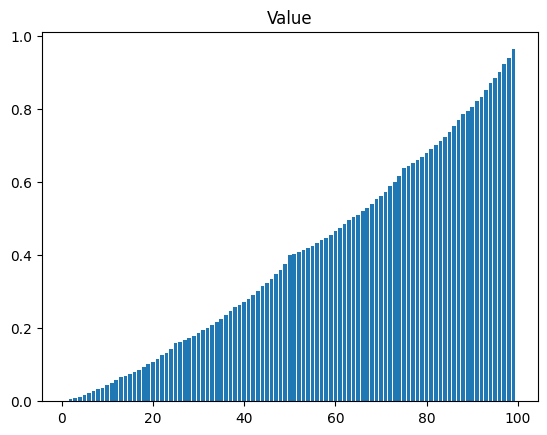

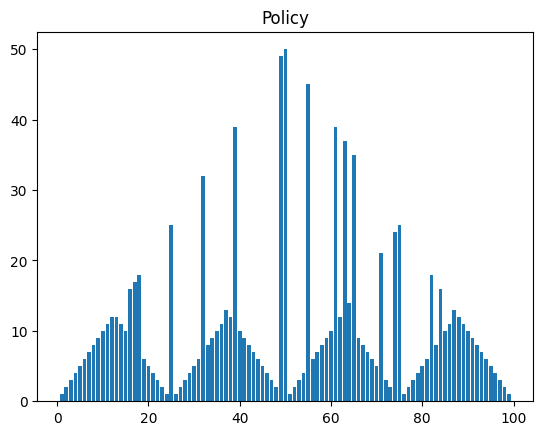

In [203]:
for i in range(100):
    values = policy_eval(values, policy)
    policy = policy_improve(values)

    clear_output(wait=True)
    plt.bar(range(1,100), list(values.values())); plt.title('Value'); plt.show()
    plt.bar(range(1,100), list(policy.values())); plt.title('Policy'); plt.show()
    